In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

addr_df = pd.read_csv("data-cleaned-v1/address_grades.csv", index_col=0)
basic_df = pd.read_csv("data-cleaned-v1/basic.csv", index_col=0)

state = addr_df[["zpid", "state"]]
price = basic_df[["zpid", "price"]]

In [103]:
state_price_df = pd.merge(state, price, how='inner', on='zpid')
state_price_df = state_price_df.drop(columns=['zpid'])
state_price_df['price'] = state_price_df['price'].map(lambda price: float(price.replace(',', '')))

state_price_mean_df = state_price_df.groupby('state').mean('price').sort_values(by=['price']).reset_index()
state_price_mean_df

,state,price
0,oh,250522.878981
1,ky,266508.496732
2,in,274641.863946
3,nc,350599.621622
4,tx,353470.992857
5,ga,363406.732394
6,sc,369759.036765
7,fl,383493.884615
8,co,496728.046154
9,nj,527192.148936


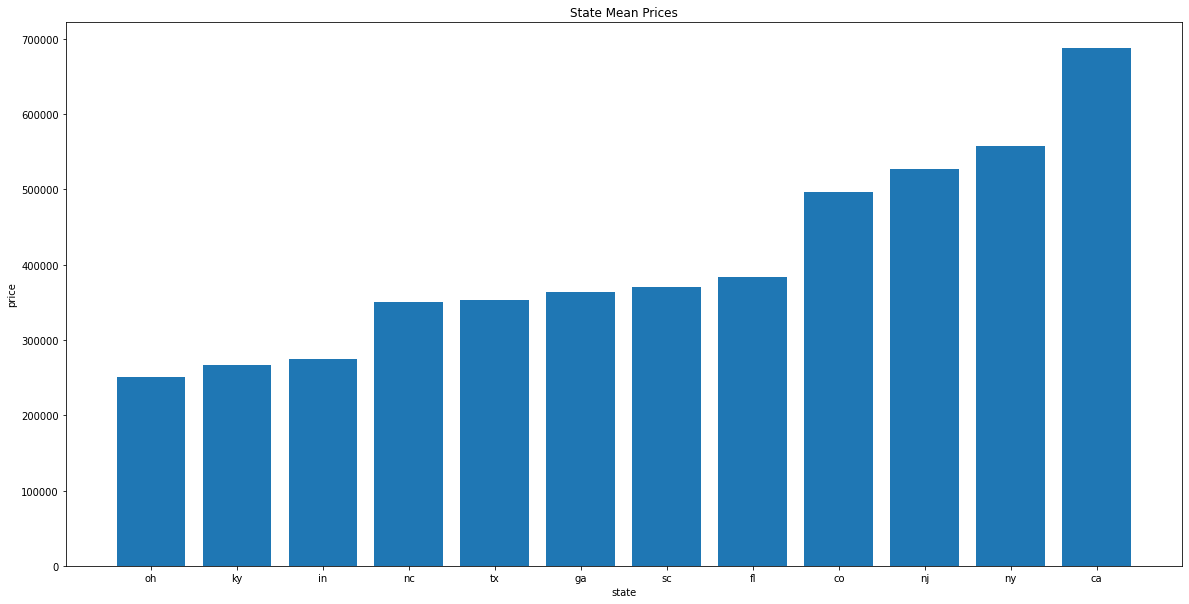

In [104]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(20)
plt.bar(state_price_mean_df['state'], state_price_mean_df['price'])
plt.xlabel("state")
plt.ylabel("price")  
plt.title("State Mean Prices")
plt.show()

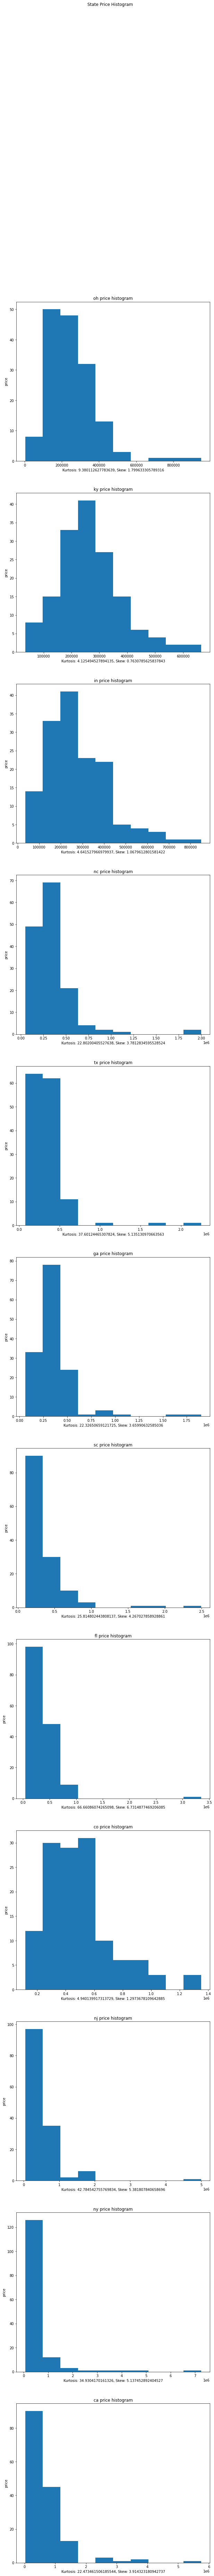

In [105]:
def price_histogram(state, ax):
    a_state_df = state_price_df[state_price_df['state'] == state]
    prices = a_state_df['price']
    k = kurtosis(prices, fisher=False)
    s = skew(prices)
    ax.set_ylabel("price")
    ax.set_title(state + ' price histogram')
    ax.set_xlabel('Kurtosis: ' + str(k) + ', Skew: ' + str(s))
    ax.hist(prices)


states = state_price_mean_df['state']
fig, axs = plt.subplots(12)
fig.suptitle("State Price Histogram")
fig.set_figwidth(10)
fig.set_figheight(12 * 10)

for i in range(0, 12):
    price_histogram(states[i], axs[i])

plt.show()


/tmp/ipykernel_5562/2270033865.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


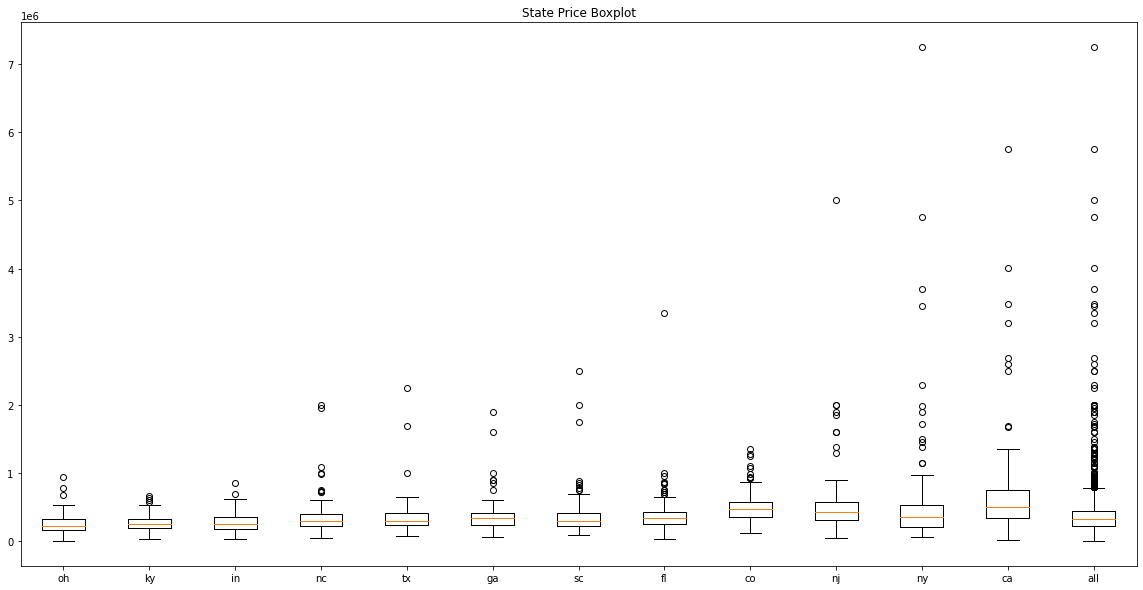

In [106]:
data = []
for i in range(0, 12):
    a_state_df = state_price_df[state_price_df['state'] == states[i]]
    data.append(a_state_df['price'])
data.append(state_price_df['price'])
labels = list(states)
labels.append('all')
fig, ax = plt.subplots(1)
plt.title("State Price Boxplot")
ax.set_xticklabels(labels)
ax.boxplot(data)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

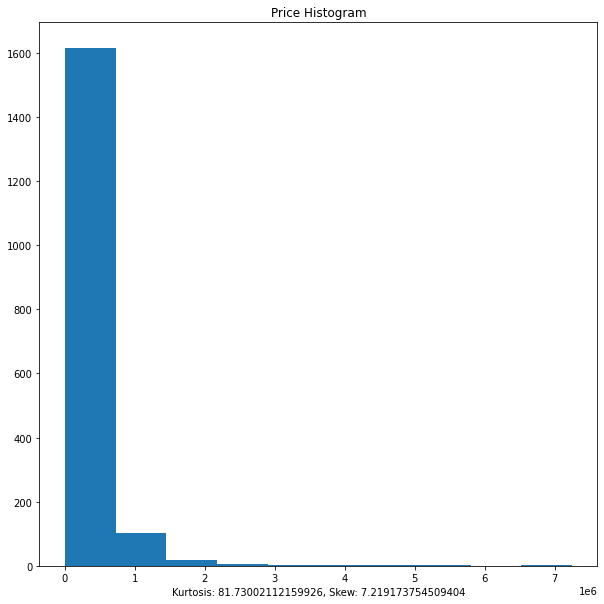

In [108]:
fig, ax = plt.subplots(1)
plt.title("Price Histogram")
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_xlabel('Kurtosis: ' + str(kurtosis(state_price_df['price'], fisher=False)) + ', Skew: ' + str(skew(state_price_df['price'])))
ax.hist(state_price_df['price'])
plt.show()